In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Cleaned and Merged.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19


In [3]:
# cols_to_drop = ['Unnamed: 5', 'Order']
# df.drop(columns=cols_to_drop, inplace=True)

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   State             185950 non-null  object 
 5   Zip Code          185950 non-null  int64  
 6   Date              185950 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 9.9+ MB


In [6]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Zip Code
count,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,63877.518935
std,51512.737110,0.442793,332.731330,37776.308300
min,141234.000000,1.000000,2.990000,2215.000000
25%,185831.250000,1.000000,11.950000,10001.000000
50%,230367.500000,1.000000,14.950000,90001.000000
75%,275035.750000,1.000000,150.000000,94016.000000
max,319670.000000,9.000000,1700.000000,98101.000000


In [7]:
from datetime import datetime
import calendar

# Creating a copy of Data-Frame
df2 = df

In [8]:
parts = df["Date"].str.split("/", n = 3, expand = True)
df2["month"]= parts[0].astype('int')
df2["day"]= parts[1].astype('int')
df2["year"]= ("20"+parts[2]).astype('int')

In [9]:
def weekend_or_weekday(year,month,day):
      
    d = datetime(year,month,day)
    if d.weekday()>4:
        return 1
    else:
        return 0
  
df2['weekend'] = df2.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year,weekend
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19,1,1,2019,0
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19,1,1,2019,0
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19,1,1,2019,0
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19,1,1,2019,0
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19,1,1,2019,0


In [10]:
# import holidays

# def is_holiday(x):
    
#   india_holidays = holidays.country_holidays('IN')
  
#   if india_holidays.get(x):
#     return 1
#   else:
#     return 0
  
# df2['holidays'] = df2['Date'].apply(is_holiday)
# df2.head()

In [11]:
df2.dropna()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year,weekend
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19,1,1,2019,0
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19,1,1,2019,0
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19,1,1,2019,0
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19,1,1,2019,0
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19,1,1,2019,0
...,...,...,...,...,...,...,...,...,...,...,...
185945,305340,Bose SoundSport Headphones,1,99.99,WA,98101,12/31/19,12,31,2019,0
185946,299900,Lightning Charging Cable,1,14.95,CA,94016,12/31/19,12,31,2019,0
185947,298874,34in Ultrawide Monitor,1,379.99,CA,90001,12/31/19,12,31,2019,0
185948,302162,Wired Headphones,1,11.99,NY,10001,12/31/19,12,31,2019,0


In [12]:
sales_by_category = df2.groupby('Product')['Quantity Ordered'].sum()

In [13]:
sorted_sales_by_category = sales_by_category.sort_values(ascending=False)
print(sorted_sales_by_category)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64


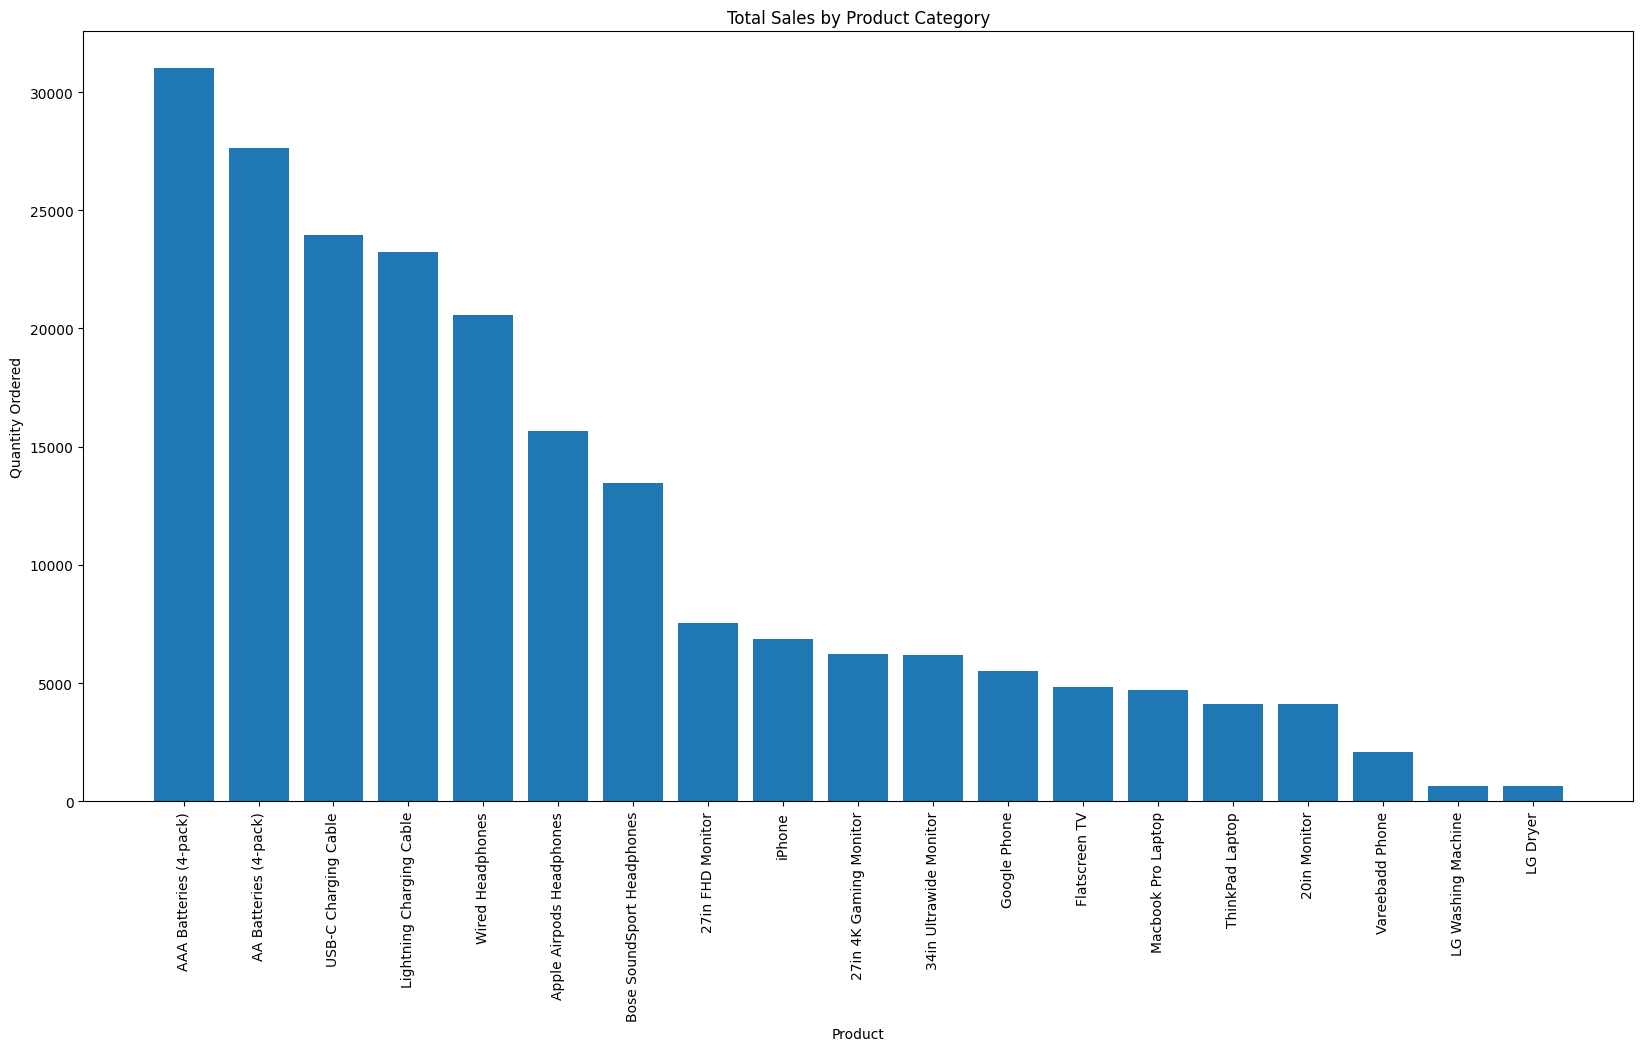

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(sorted_sales_by_category.index, sorted_sales_by_category)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Total Sales by Product Category')
plt.xticks(rotation='vertical')
plt.show()

In [15]:
df2['m1'] = np.sin(df2['month'] * (2 * np.pi / 12))
df2['m2'] = np.cos(df2['month'] * (2 * np.pi / 12))
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year,weekend,m1,m2
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19,1,1,2019,0,0.5,0.866025
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19,1,1,2019,0,0.5,0.866025
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19,1,1,2019,0,0.5,0.866025
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19,1,1,2019,0,0.5,0.866025
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19,1,1,2019,0,0.5,0.866025


In [16]:
def which_day(year, month, day):
      
    d = datetime(year,month,day)
    return d.weekday()
  
df2['weekday'] = df2.apply(lambda x: which_day(x['year'], x['month'], x['day']), axis=1)
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year,weekend,m1,m2,weekday
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19,1,1,2019,0,0.5,0.866025,1
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19,1,1,2019,0,0.5,0.866025,1
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19,1,1,2019,0,0.5,0.866025,1


In [17]:
df2['Product'].nunique()

19

In [18]:
df2['State'].nunique()

8

In [19]:
df2.shape

(185950, 14)

In [20]:
df2.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
State                object
Zip Code              int64
Date                 object
month                 int32
day                   int32
year                  int32
weekend               int64
m1                  float64
m2                  float64
weekday               int64
dtype: object

In [21]:
f'Total dates: {df2[["Date"]].nunique()[0]}'

'Total dates: 366'

In [22]:
df3 = df2
df3 = df3.groupby('Date').sum('Quantity Ordered')
df3.index = pd.to_datetime(df3.index)
df3 = df3.drop(['Order ID','month', 'Price Each', 'day', 'year', 'weekend', 'm1', 'm2', 'weekday', 'Zip Code'], axis=1)
df3.head()

,Quantity Ordered
Date,
2019-01-01,343
2020-01-01,41
2019-01-02,368
2019-01-03,330
2019-01-04,330


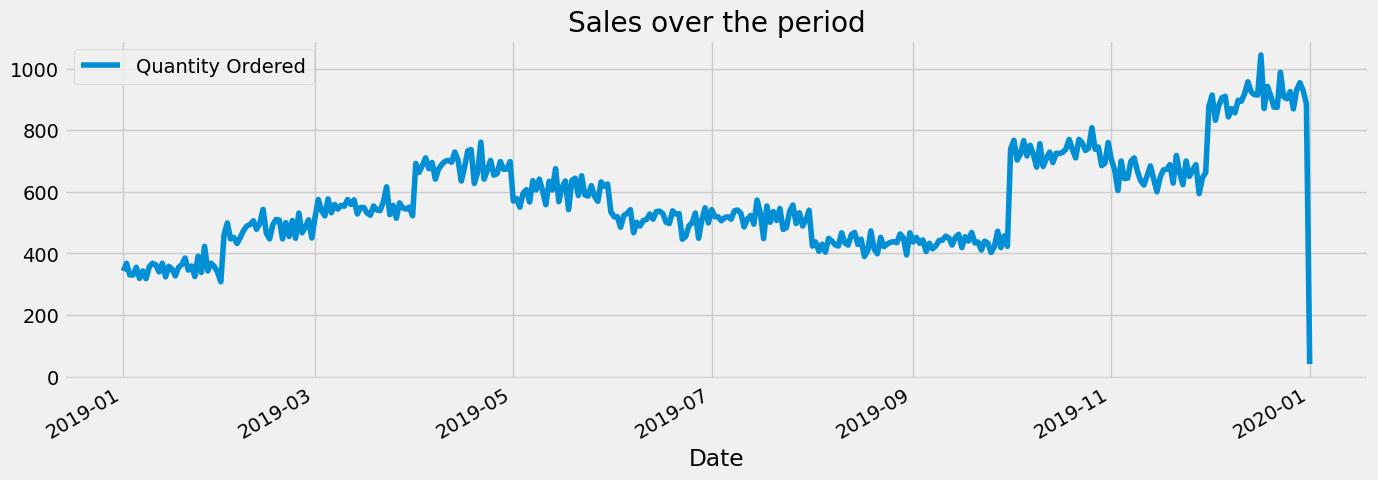

In [23]:
import seaborn as sns

color_pallet = sns.color_palette()
plt.style.use('fivethirtyeight')

df3.plot(
        # style='.',
        figsize=(15, 5),
        title='Sales over the period')
plt.show()

In [25]:
df5 = df2
df5 = df5.groupby('Product').sum('Quantity Ordered')
# df3.index = pd.to_datetime(df3.index)
df5 = df5.drop(['Order ID','month', 'Price Each', 'day', 'year', 'weekend', 'm1', 'm2', 'weekday', 'Zip Code'], axis=1)
df5.head()

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635


In [ ]:
df5

,Quantity Ordered
Product,
0,4129
1,6244
2,7550
3,6199
4,27635
5,31017
6,15661
7,13457
8,4819


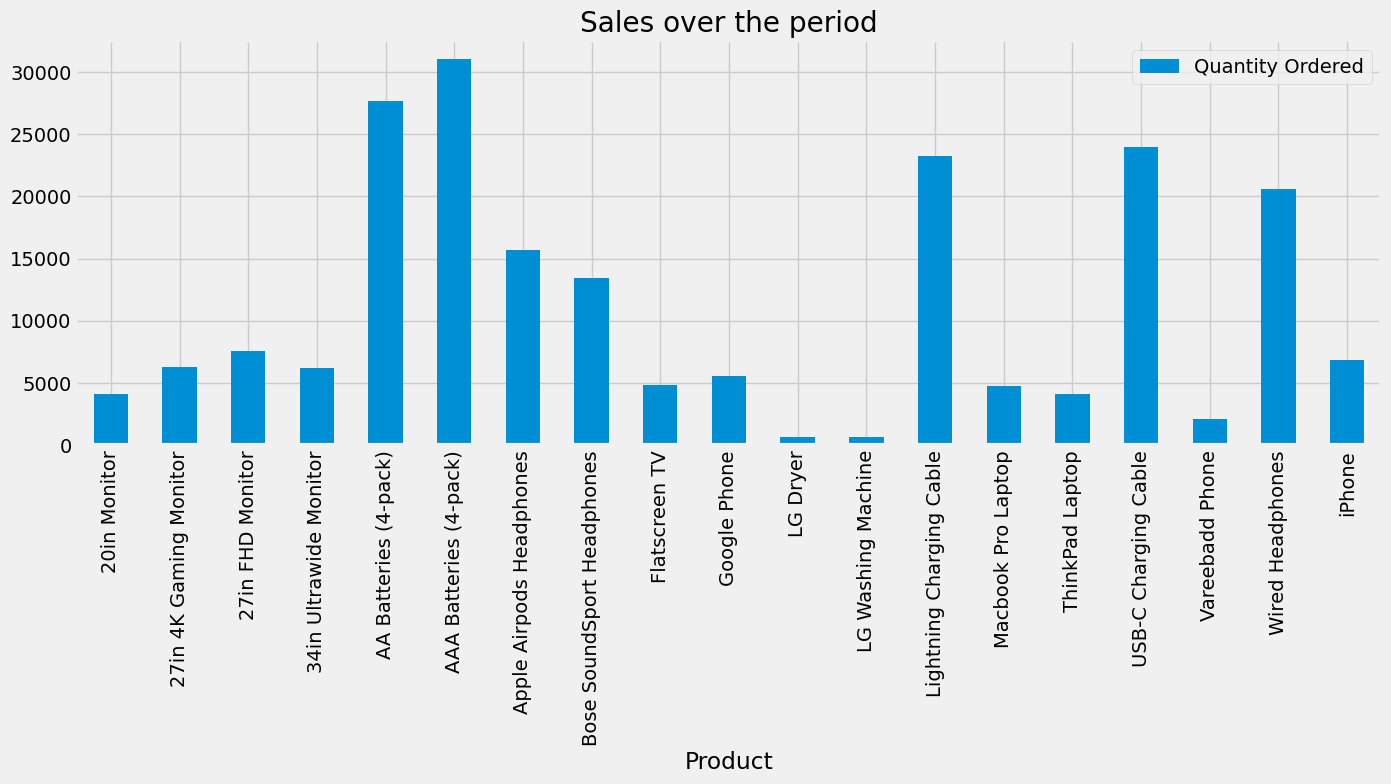

In [26]:
df5.plot(
        kind='bar',
        figsize=(15, 5),
        title='Sales over the period')
plt.show()

In [27]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year,weekend,m1,m2,weekday
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19,1,1,2019,0,0.5,0.866025,1
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19,1,1,2019,0,0.5,0.866025,1
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19,1,1,2019,0,0.5,0.866025,1


C:\Users\bhowm\AppData\Local\Temp\ipykernel_7676\2196135840.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)
C:\Users\bhowm\AppData\Local\Temp\ipykernel_7676\2196135840.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby(col).mean()['Price Each'].plot.bar()
C:\Users\bhowm\AppData\Local\Temp\ipykernel_7676\2196135840.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby(col).mean()['Price Each'].plot.bar()
C:\Users\bhowm\AppData\Loca

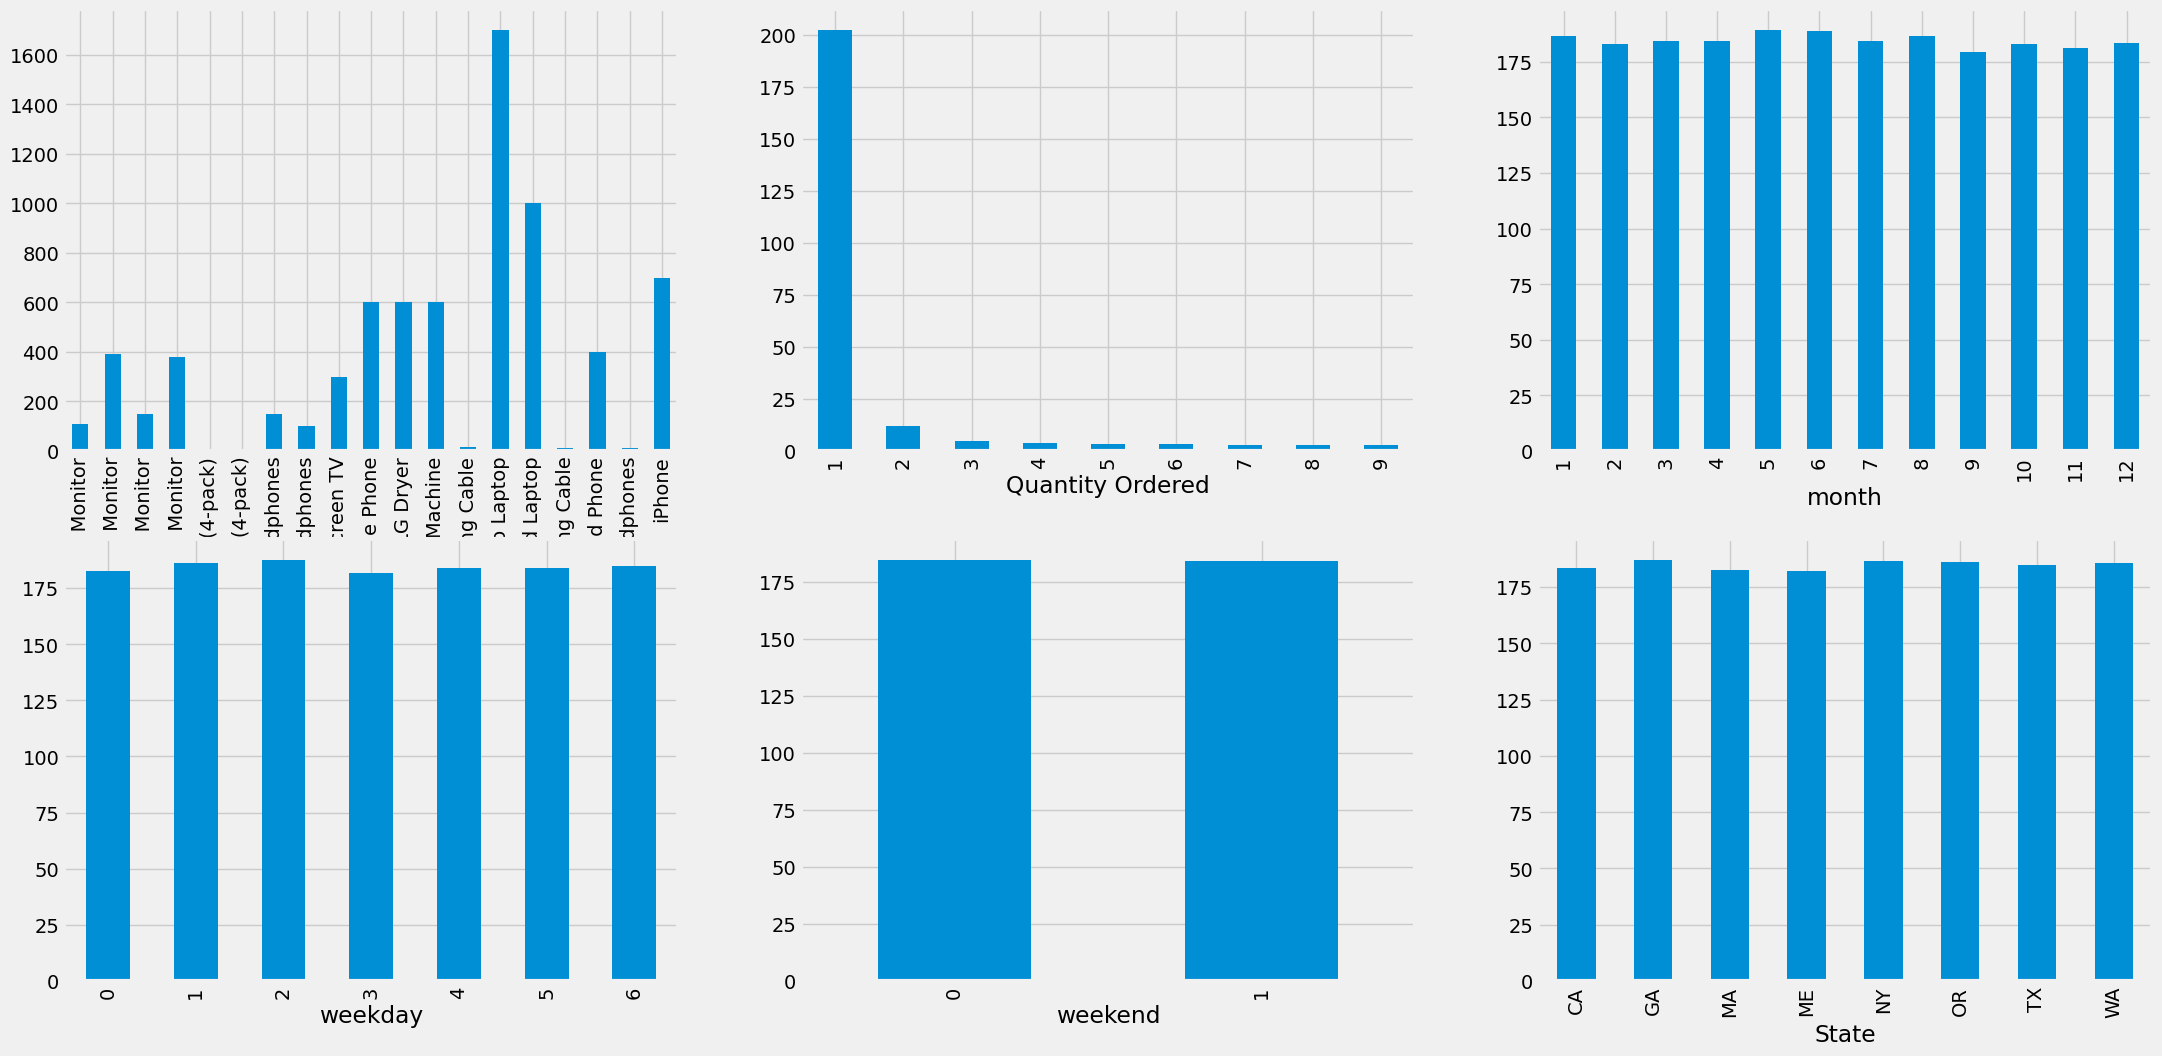

In [28]:
features = ['Product', 'Quantity Ordered', 'month',\
            'weekday', 'weekend', 'State']
  
plt.subplots(figsize=(24, 12))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    df2.groupby(col).mean()['Price Each'].plot.bar()
plt.show()

C:\Users\bhowm\AppData\Local\Temp\ipykernel_7676\315567278.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('month').mean()['Price Each'].plot()


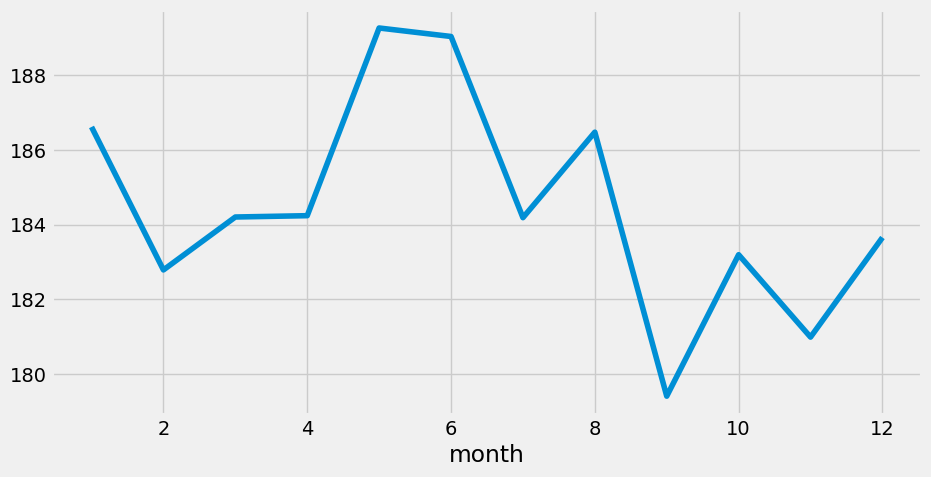

In [29]:
plt.figure(figsize=(10,5))
df2.groupby('month').mean()['Price Each'].plot()
plt.show()

C:\Users\bhowm\AppData\Local\Temp\ipykernel_7676\3122223319.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('month').mean()['Quantity Ordered'].plot()


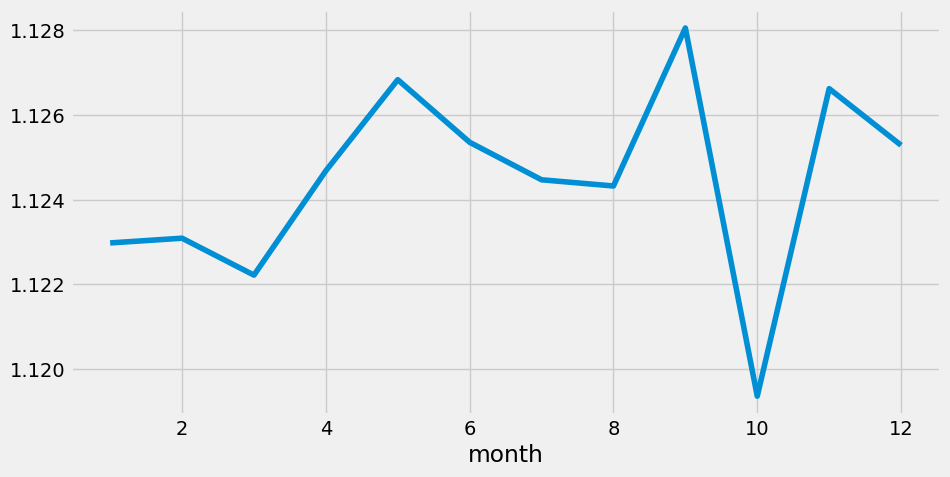

In [30]:
plt.figure(figsize=(10,5))
df2.groupby('month').mean()['Quantity Ordered'].plot()
plt.show()

C:\Users\bhowm\AppData\Local\Temp\ipykernel_7676\1671880575.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('Product').mean()['Quantity Ordered'].plot()


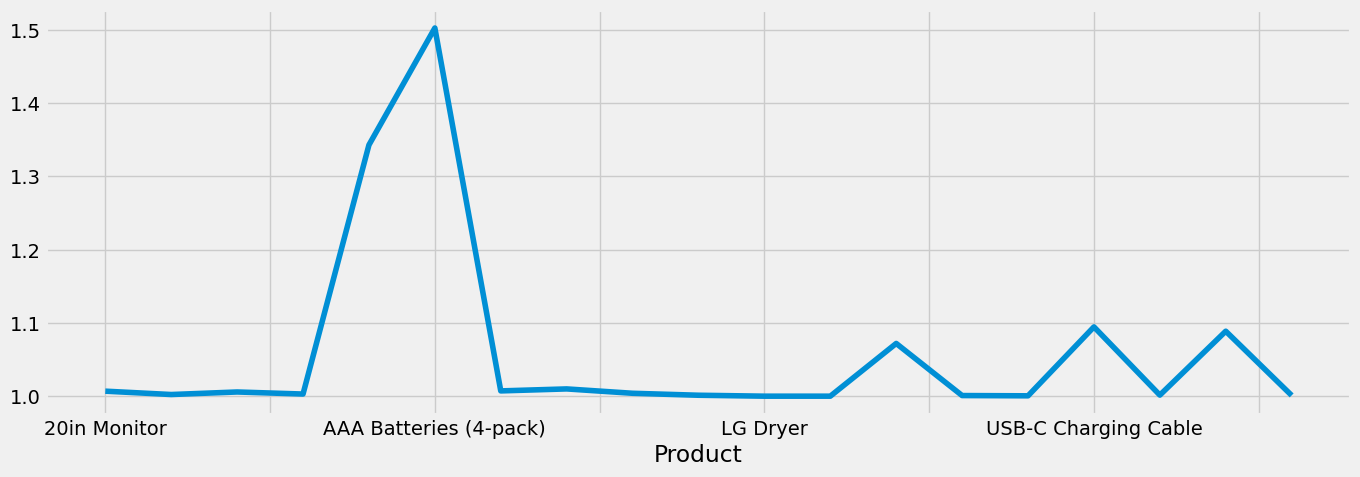

In [31]:
plt.figure(figsize=(15,5))
df2.groupby('Product').mean()['Quantity Ordered'].plot()
plt.show()

C:\Users\bhowm\AppData\Local\Temp\ipykernel_7676\2640209622.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
C:\Users\bhowm\AppData\Local\Temp\ipykernel_7676\2640209622.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df3['Quantity Ordered'])


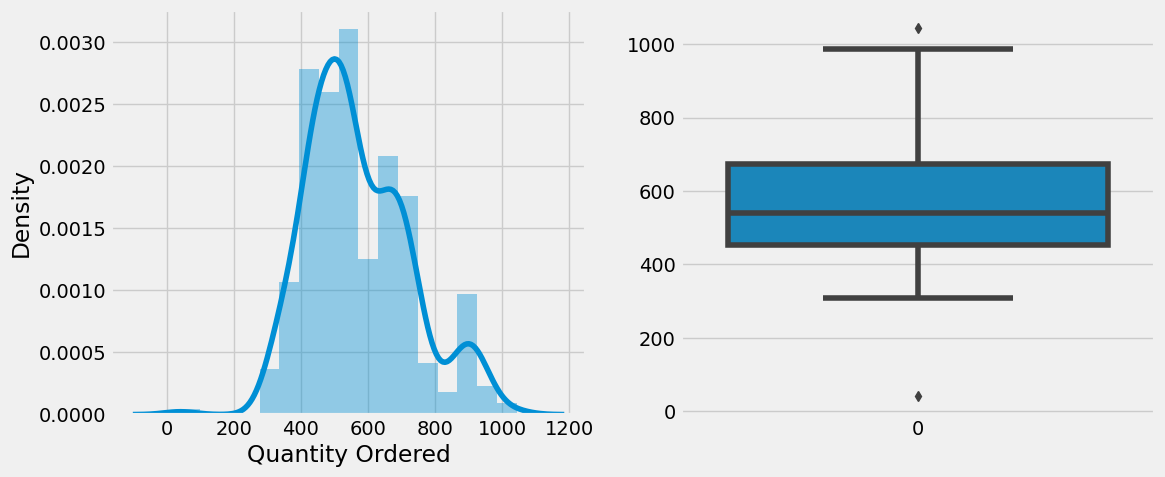

In [32]:
import seaborn as sb

plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sb.distplot(df3['Quantity Ordered'])
  
plt.subplot(1, 2, 2)
sb.boxplot(df3['Quantity Ordered'])
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
  
import warnings
warnings.filterwarnings('ignore')

In [34]:
le = LabelEncoder()
df4 = df2
df4['Product'] = le.fit_transform(df4['Product'])
df4.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year,weekend,m1,m2,weekday
0,141604,2,1,149.99,CA,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
1,146912,4,1,3.84,CA,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
2,147474,17,1,11.99,WA,98101,01/01/19,1,1,2019,0,0.5,0.866025,1
3,146833,6,1,150.00,MA,2215,01/01/19,1,1,2019,0,0.5,0.866025,1
4,149368,5,1,2.99,TX,75001,01/01/19,1,1,2019,0,0.5,0.866025,1


In [35]:
df4['State'] = le.fit_transform(df4['State'])
df4.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year,weekend,m1,m2,weekday
0,141604,2,1,149.99,0,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
1,146912,4,1,3.84,0,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
2,147474,17,1,11.99,7,98101,01/01/19,1,1,2019,0,0.5,0.866025,1
3,146833,6,1,150.00,2,2215,01/01/19,1,1,2019,0,0.5,0.866025,1
4,149368,5,1,2.99,6,75001,01/01/19,1,1,2019,0,0.5,0.866025,1


In [36]:
# df4 = df4.groupby(['month', 'Product', 'State']).sum('Quantity Ordered')
# df4.index = pd.to_datetime(df4.index)
df4 = df4.drop(['Order ID', 'Price Each', 'day', 'year', 'weekend', 'm1', 'm2', 'weekday', 'Zip Code'], axis=1)
df4.head()

,Product,Quantity Ordered,State,Date,month
0,2,1,0,01/01/19,1
1,4,1,0,01/01/19,1
2,17,1,7,01/01/19,1
3,6,1,2,01/01/19,1
4,5,1,6,01/01/19,1


In [37]:
df4

,Product,Quantity Ordered,State,Date,month
0,2,1,0,01/01/19,1
1,4,1,0,01/01/19,1
2,17,1,7,01/01/19,1
3,6,1,2,01/01/19,1
4,5,1,6,01/01/19,1
...,...,...,...,...,...
185945,7,1,7,12/31/19,12
185946,12,1,0,12/31/19,12
185947,3,1,0,12/31/19,12
185948,17,1,4,12/31/19,12


In [53]:
# df4.plot(
#         kind='bar',
#         x='State',
#         y='Quantity Ordered',
#         figsize=(15, 5),
#         title='Sales over the period')
# plt.show()

<BarContainer object of 185950 artists>

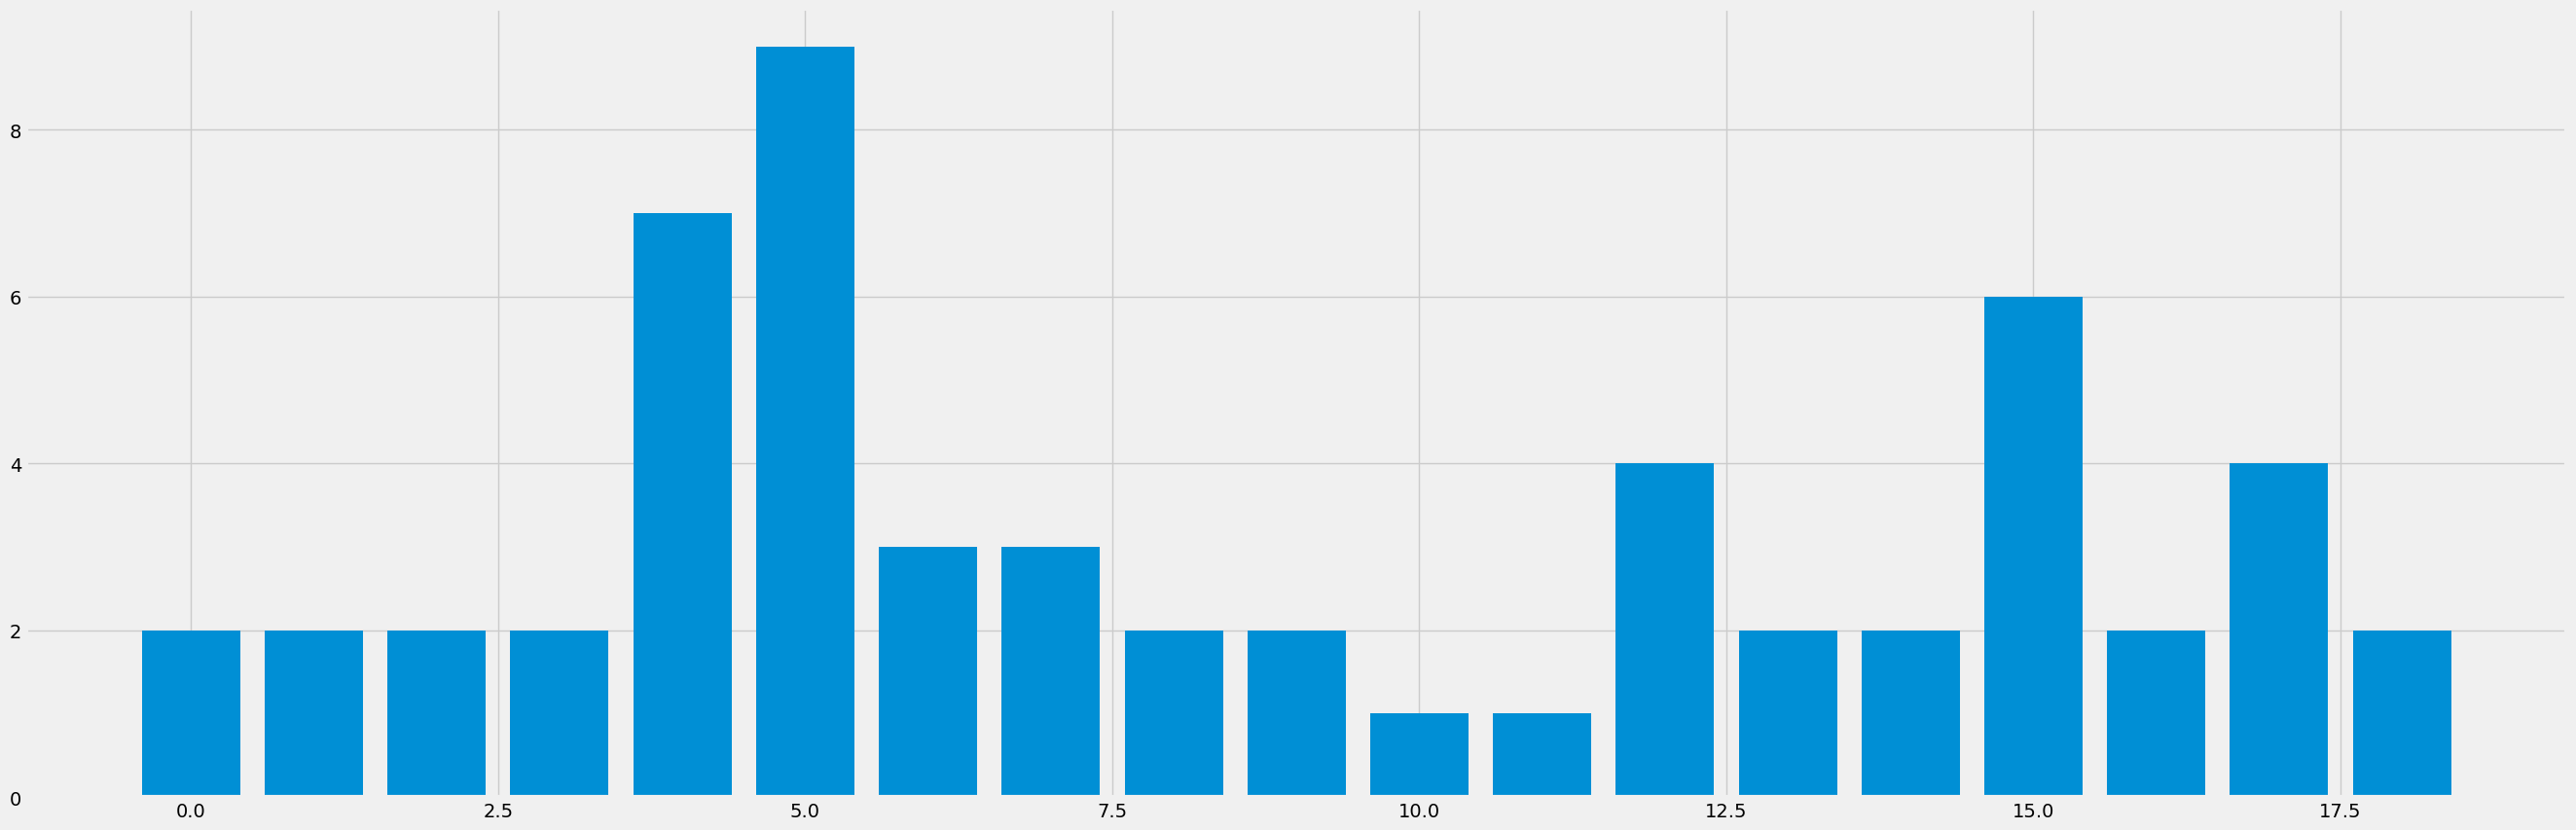

In [39]:
# x_axis = df4['Product']
# y_axis = df4['Quantity Ordered']

# # Figure Size
# from matplotlib import pyplot as plt
# fig = plt.figure(figsize =(30, 10))
# plt.bar(x_axis, y_axis)

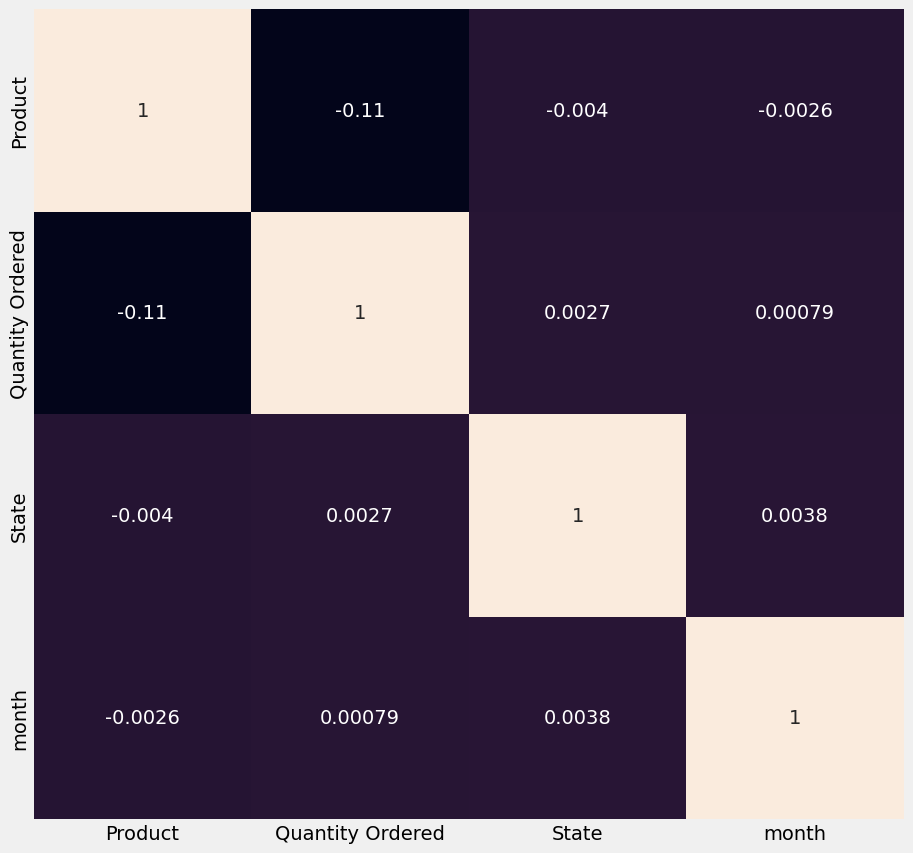

In [38]:
plt.figure(figsize=(10, 10))
sb.heatmap(df4.corr(),
           annot=True,
           cbar=False)
plt.show()

In [38]:
df4.to_csv('Sales.csv', index=True)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
  
import warnings
warnings.filterwarnings('ignore')

In [69]:
features = df4.drop(['Product', 'Date'], axis=1)
target = df4['Product'].values
  
  
X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                                  test_size = 0.05,
                                                  random_state=22)
X_train.shape, X_val.shape

((176652, 3), (9298, 3))

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [71]:
models = [LinearRegression(), XGBRegressor(), Lasso(), Ridge()]
  
for i in range(4):
    models[i].fit(X_train, Y_train)
  
    print(f'{models[i]} : ')
  
    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))
  
    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()

LinearRegression() : 
Training Error :  4.817838707578415
Validation Error :  4.8104494387728725

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 
Training Error :  4.804559365302581
Validation Error :  4.8050562327947635

Lasso() : 
Training Error :  4.883511455599185
Validation Error :  4.8802944636153

In [75]:
# from sklearn.metrics import r2_score
# model = LinearRegression()

# # Fit the model to the training data
# model.fit(X_train, Y_train)

# # Make predictions on the test data
# y_pred = model.predict(X_val)

# # Compute the R-squared score to measure model accuracy
# r2 = r2_score(Y_val, y_pred)

# # Print the R-squared score
# print("R-squared:", r2)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = [LinearRegression(), XGBRegressor(), Lasso(), Ridge()]

for model in models:
    # train the model
    model.fit(X_train, Y_train)
    
    # make predictions on the testing set
    y_pred = model.predict(X_val)
    
    # calculate MAE and MSE
    mae = mean_absolute_error(Y_val, y_pred)
    mse = mean_squared_error(Y_val, y_pred)
    
    # calculate R-squared
    r2 = r2_score(Y_val, y_pred)
    
    # print the results
    print(model)
    print('MAE:', mae)
    print('MSE:', mse)
    print('R-squared:', r2)
    print()

LinearRegression()
MAE: 4.8104494387728725
MSE: 28.502744256995246
R-squared: 0.013783844632680453

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
MAE: 4.8050562327947635
MSE: 28.543110068539367
R-squared: 0.012387157523875092

Lasso()
MAE: 4.8802944636153445
MSE: 28.90260581838269
R-squared: -5.166286073

In [76]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_val)

In [77]:
y_pred

array([9.217541 , 9.401623 , 7.8288636, ..., 9.243922 , 9.243922 ,
       9.31837  ], dtype=float32)

In [73]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1)

# Fit the model to the training data
xg_reg.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = xg_reg.predict(X_val)

# Compute the mean squared error of the predictions
mse = mean_squared_error(Y_val, y_pred)

# Compute the accuracy of the model
accuracy = xg_reg.score(X_val, Y_val)

# Print the mean squared error and accuracy
print("Mean squared error: {:.2f}".format(mse))
print("Accuracy: {:.2f}".format(accuracy))

Mean squared error: 28.55
Accuracy: 0.01


In [61]:
df6 = df4
df6 = df6.groupby(['month','Product']).sum('Quantity Ordered')
df6 = df6.drop(['State'], axis=1)
df6.head()

Quantity Ordered
month Product                  
1     0                     218
      1                     313
      2                     422
      3                     314
      4                    1424

In [65]:
# train = df6.loc[df6['month'].index < 12]
# test = df6.loc[df6['month'].index >= 12]
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X = df6.drop('Quantity Ordered', axis=1)  # features
y = df6['Quantity Ordered']  # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape of the data
print('Training data shape:', X_train.shape, y_train.shape)
print('Testing data shape:', X_test.shape, y_test.shape)

Training data shape: (182, 0) (182,)
Testing data shape: (46, 0) (46,)


In [66]:
# fig, ax = plt.subplots(figsize=(15, 5))
# train.plot(ax=ax, label='Training Set', title='Train/Test Split data')
# test.plot(ax=ax, label='Test Set')
# ax.axvline(1, color='Gray', ls='--')
# ax.legend(['Training Set', 'Test Set'])
# plt.show()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# make predictions on the testing set
y_pred = lr.predict(X_test)

# evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

ValueError: at least one array or dtype is required

In [67]:
print(df6.isnull().sum())

Quantity Ordered    0
dtype: int64


In [68]:
print(X_train.dtypes)
print(y_train.dtype)

Series([], dtype: object)
int64
